In [1]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from utils import *

pd.set_option('display.max_rows', 100)
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [2]:
# File loading
df = pd.read_excel(r'..\..\Data\Sales Managers.xlsx', 'Sheet1')
df.name = 'SalesManagers'

In [3]:
# Dataframe head
df.head()

,Region Sales Rep,Region Sales Manager
0,Abdelkader Drouiche,Ronan Magnen
1,Agent Ouest,Vilayvanh Vetsmany
2,Alexandra Van Oost,Silke Neustifter
3,Allenco Med,Usha Pillay
4,Andrew Elliott,Mark Smith


In [4]:
# Dataframe shape
df_shape = df.shape
print("This dataframe has %d columns and %d rows." % (df_shape[1], df_shape[0]))

This dataframe has 2 columns and 93 rows.


There is 93 region sales representative.

In [5]:
# Dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Region Sales Rep      93 non-null     object
 1   Region Sales Manager  93 non-null     object
dtypes: object(2)
memory usage: 1.6+ KB


In [6]:
# Categorical features modalities
modalities_table(df)

,Modalities
Region Sales Manager,26
Region Sales Rep,93


<AxesSubplot:xlabel='count', ylabel='Region Sales Manager'>

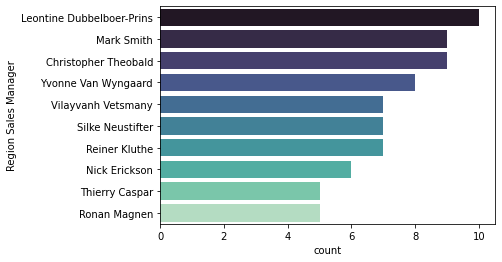

In [7]:
# Distribution of categorical columns        
sns.countplot(y='Region Sales Manager', data=df, 
              palette='mako', order=df['Region Sales Manager'].value_counts().iloc[:10].index)

In [8]:
# Missing value summary
missing_values_table(df)

Your selected dataframe has 2 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


The managers with most people in their teams are:
- **Leontine Dubbelboer-Prins**
- **Christopher Theobald**
- **Mark Smith**
- **Yvonne Van Wyngaard**

In [9]:
# Verification of sales rep column
df_salesrep_check = df.sort_values('Region Sales Rep')
df_salesrep_check

,Region Sales Rep,Region Sales Manager
0,Abdelkader Drouiche,Ronan Magnen
1,Agent Ouest,Vilayvanh Vetsmany
2,Alexandra Van Oost,Silke Neustifter
3,Allenco Med,Usha Pillay
4,Andrew Elliott,Mark Smith
5,Anke Hermsen,Silke Neustifter
6,Anna Crossman,Nick Erickson
7,Anne-Marie Radermacher,Leontine Dubbelboer-Prins
8,Arjen Neggers,Reiner Kluthe
9,Asif Khan,Nick Erickson


In [10]:
# Region Sales Rep that need explanation
serie_expl = df.iloc[[1, 22, 54, 55, 56, 57, 58, 73, 74, 88, 89],0]
pd.DataFrame(serie_expl)

,Region Sales Rep
1,Agent Ouest
22,Community
54,NSM S&IP UK
55,OpenDE04
56,OpenSIPDE01
57,OpenSIPDE02
58,OpRHFR01
73,Sekhu L
74,Sekhu L (NW)
88,Van Wyng C (Eastern Cape)


In [11]:
df_same = df[df.iloc[:,0].eq(df.iloc[:,1])]
same = set(df_same.iloc[:,1])-set(df[~df.iloc[:,0].eq(df.iloc[:,1])].iloc[:,1])
df_same1 = df[df['Region Sales Manager'].isin(same)]
df_same1

,Region Sales Rep,Region Sales Manager
10,Bern Barker,Bern Barker
11,Brian Burgess,Brian Burgess
14,Carlos Ferreira,Carlos Ferreira
23,Denis Fourre,Denis Fourre
27,Ezio Blanc,Ezio Blanc
28,Fares Makarem,Fares Makarem
29,Fuad Rashid,Fuad Rashid
38,Kees Brom,Kees Brom
67,Roman Kostolansky,Roman Kostolansky
70,Rustam Mikhailov,Rustam Mikhailov


In [12]:
df_same = df[df.iloc[:,0].eq(df.iloc[:,1])]
same2 = set(df_same.iloc[:,1]).intersection(set(df[~df.iloc[:,0].eq(df.iloc[:,1])].iloc[:,1]))
df_same2 = df[df['Region Sales Manager'].isin(same2)].sort_values(['Region Sales Manager', 'Region Sales Rep'])
df_same2

,Region Sales Rep,Region Sales Manager
18,Christopher Theobald,Christopher Theobald
21,Claudia Koch,Christopher Theobald
31,Heinz Heyll,Christopher Theobald
32,Herbert Holz,Christopher Theobald
40,Lenka Sembach,Christopher Theobald
56,OpenSIPDE01,Christopher Theobald
57,OpenSIPDE02,Christopher Theobald
83,Thomas Mund,Christopher Theobald
84,Tobias Hayk,Christopher Theobald
7,Anne-Marie Radermacher,Leontine Dubbelboer-Prins


In [13]:
df[df['Region Sales Manager']=='Bern Barker']

,Region Sales Rep,Region Sales Manager
10,Bern Barker,Bern Barker


In [14]:
df_expl = pd.DataFrame(serie_expl)
print("\"\n\"".join(sorted(set(serie_expl))))

Agent Ouest"
"Community"
"NSM S&IP UK"
"OpRHFR01"
"OpenDE04"
"OpenSIPDE01"
"OpenSIPDE02"
"Sekhu L"
"Sekhu L (NW)"
"Van Wyng C (Eastern Cape)"
"Van Wyng C (Western Cape)


In [15]:
# Save data that needs explanation
save_values_table(df_expl, 'RegionSalesRep')

In [16]:
# Agents who are at the same time Region Sales Rep and Region Sales Manager
df_same = df[df.iloc[:,0].eq(df.iloc[:,1])]
df_same

,Region Sales Rep,Region Sales Manager
10,Bern Barker,Bern Barker
11,Brian Burgess,Brian Burgess
14,Carlos Ferreira,Carlos Ferreira
18,Christopher Theobald,Christopher Theobald
23,Denis Fourre,Denis Fourre
27,Ezio Blanc,Ezio Blanc
28,Fares Makarem,Fares Makarem
29,Fuad Rashid,Fuad Rashid
38,Kees Brom,Kees Brom
41,Leontine Dubbelboer-Prins,Leontine Dubbelboer-Prins


In [17]:
# Save data that contains similarities
save_values_table(df_same, 'RegionSalesRep', 'similarity')

In [18]:
# Verification of sales manager column
salesmanager = sorted(list(set(df['Region Sales Manager'])))
df_salesmanager_check = pd.DataFrame(salesmanager, columns=['Region Sales Manager'])
df_salesmanager_check

,Region Sales Manager
0,Bern Barker
1,Brian Burgess
2,Carlos Ferreira
3,Christopher Theobald
4,Denis Fourre
5,Ezio Blanc
6,Fares Makarem
7,Fuad Rashid
8,Kees Brom
9,Leontine Dubbelboer-Prins


In [19]:
for c in df.select_dtypes(['object']).columns:
    print(c + ' VARCHAR(%d),' % max(df[c].str.len()))

Region Sales Rep VARCHAR(25),
Region Sales Manager VARCHAR(25),


## The SalesManager dimension should be in this schema :
<br/>
[ID] [int] IDENTITY(1,1) NOT NULL,<br/>
SalesManager VARCHAR(25) NOT NULL